# Prepare Exercises

##### *Imports:*

In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from env import user, password, host
import os
from acquire import wrangle_store_data
from swapi_acquire import get_energy_data
import prepare as p

import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

#### *The end result of this exercise should be a file named prepare.py.*

#### **Store Data:**

#### Using your store items data:



In [2]:
store = wrangle_store_data()
store.head()

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
store_id,,,,,,,,,,,,,
1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [3]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 1 to 10
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   item_upc14     913000 non-null  int64  
 2   item_upc12     913000 non-null  int64  
 3   item_brand     913000 non-null  object 
 4   item_name      913000 non-null  object 
 5   item_price     913000 non-null  float64
 6   sale_id        913000 non-null  int64  
 7   sale_date      913000 non-null  object 
 8   sale_amount    913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_zipcode  913000 non-null  int64  
 11  store_city     913000 non-null  object 
 12  store_state    913000 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 97.5+ MB


In [4]:
# no nulls, but no date dtype

#### 1. Convert date column to datetime format.


In [5]:
store = p.convert_date(store)
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 1 to 10
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_id        913000 non-null  int64         
 1   item_upc14     913000 non-null  int64         
 2   item_upc12     913000 non-null  int64         
 3   item_brand     913000 non-null  object        
 4   item_name      913000 non-null  object        
 5   item_price     913000 non-null  float64       
 6   sale_id        913000 non-null  int64         
 7   sale_date      913000 non-null  datetime64[ns]
 8   sale_amount    913000 non-null  int64         
 9   store_address  913000 non-null  object        
 10  store_zipcode  913000 non-null  int64         
 11  store_city     913000 non-null  object        
 12  store_state    913000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 97.5+ MB


#### 2. Plot the distribution of sale_amount and item_price.


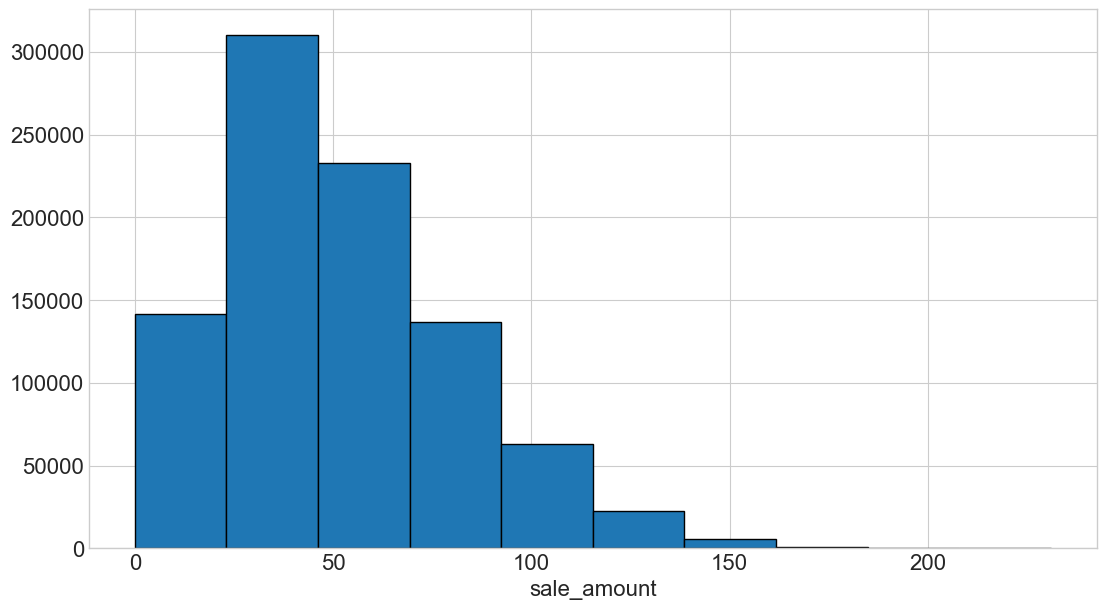

In [6]:
plt.hist(x=store.sale_amount, ec = 'black')
plt.xlabel('sale_amount')
plt.show()

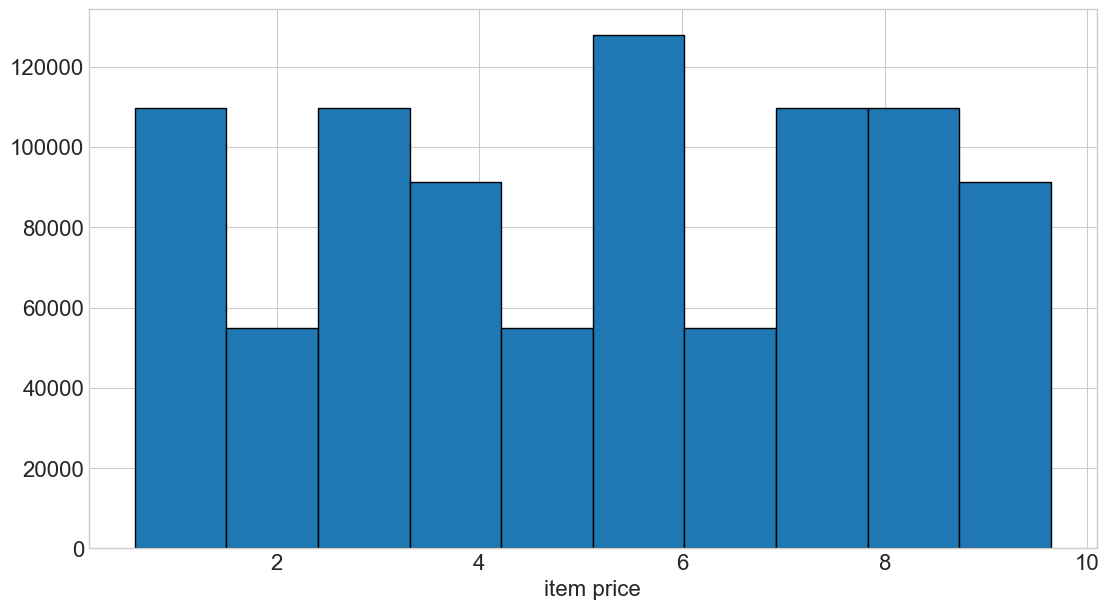

In [7]:
plt.hist(x=store.item_price, ec='black')
plt.xlabel('item price')
plt.show()

#### 3. Set the index to be the datetime variable.


In [8]:
store = p.set_date_index(store)
store.head()

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,
2013-01-01,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX
2013-01-01,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX


#### 4. Add a 'month' and 'day of week' column to your dataframe.


In [9]:
store = p.add_columns(store)
store.head()

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


#### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


In [10]:
# store['sales_total'] = store.sale_amount * store.item_price
store.head()

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


#### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [11]:
# see prepare.py

#### **OPSD Germany**

#### *Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:*



In [12]:
df = get_energy_data()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4383 non-null   int64  
 1   Date         4383 non-null   object 
 2   Consumption  4383 non-null   float64
 3   Wind         2920 non-null   float64
 4   Solar        2188 non-null   float64
 5   Wind+Solar   2187 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 205.6+ KB


In [14]:
# date is an object, lots of nulls, possibly where
# no power is being generated by that source, like
# solar at night

In [15]:
# make columns pythonic
df = p.pythonic_names_energy(df)

In [16]:
df.head()

,Unnamed: 0,date,consumption,wind,solar,wind_and_solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


#### 1. Convert date column to datetime format.


In [17]:
df = p.convert_date_energy(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      4383 non-null   int64         
 1   date            4383 non-null   datetime64[ns]
 2   consumption     4383 non-null   float64       
 3   wind            2920 non-null   float64       
 4   solar           2188 non-null   float64       
 5   wind_and_solar  2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 205.6 KB


In [18]:
df = p.drop_columns_energy(df)

#### 2. Plot the distribution of each of your variables.


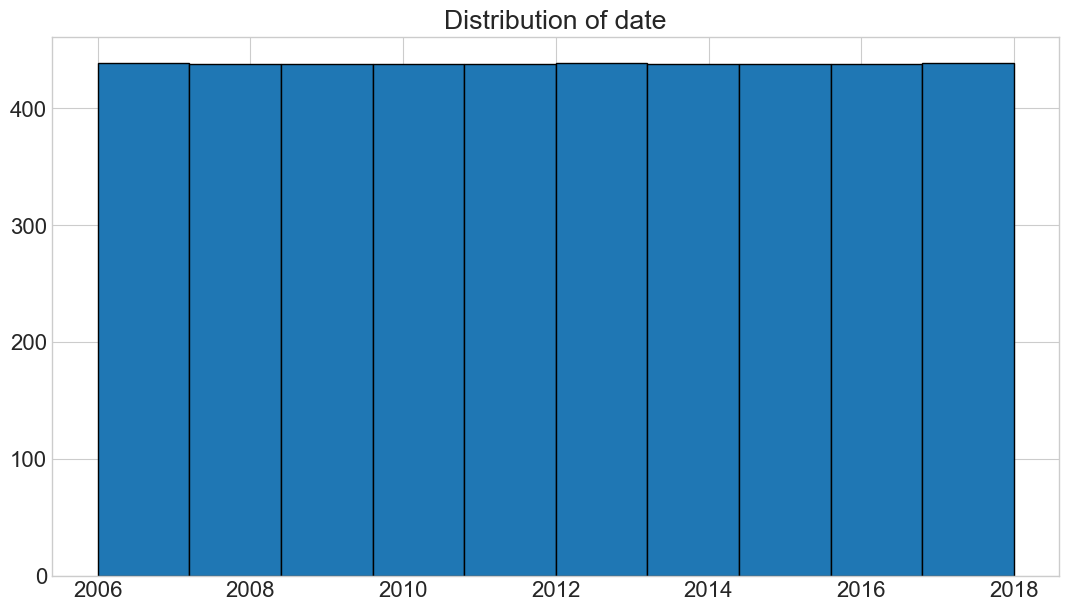

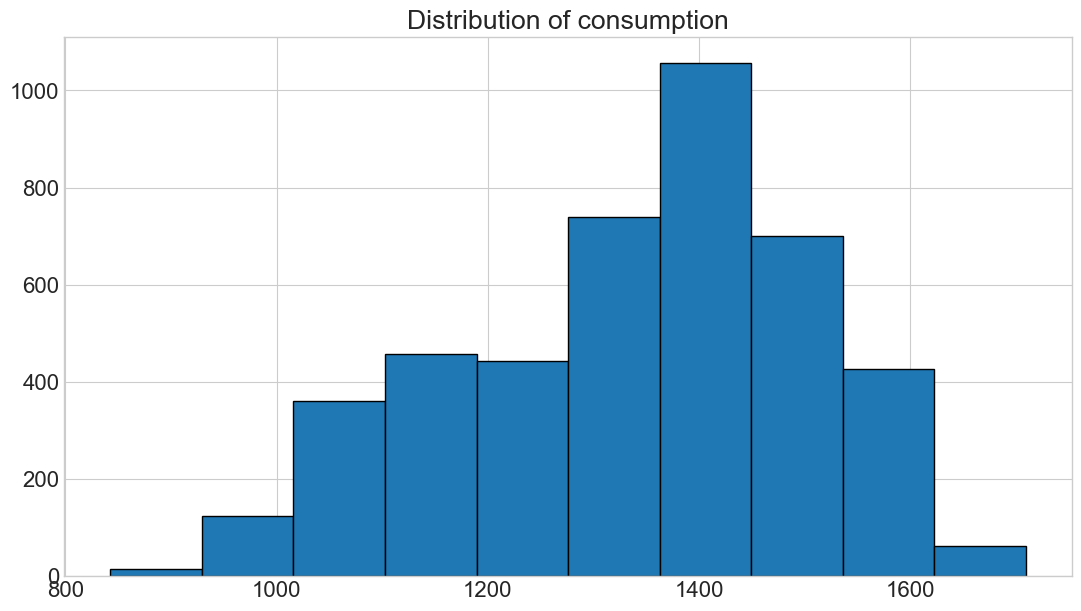

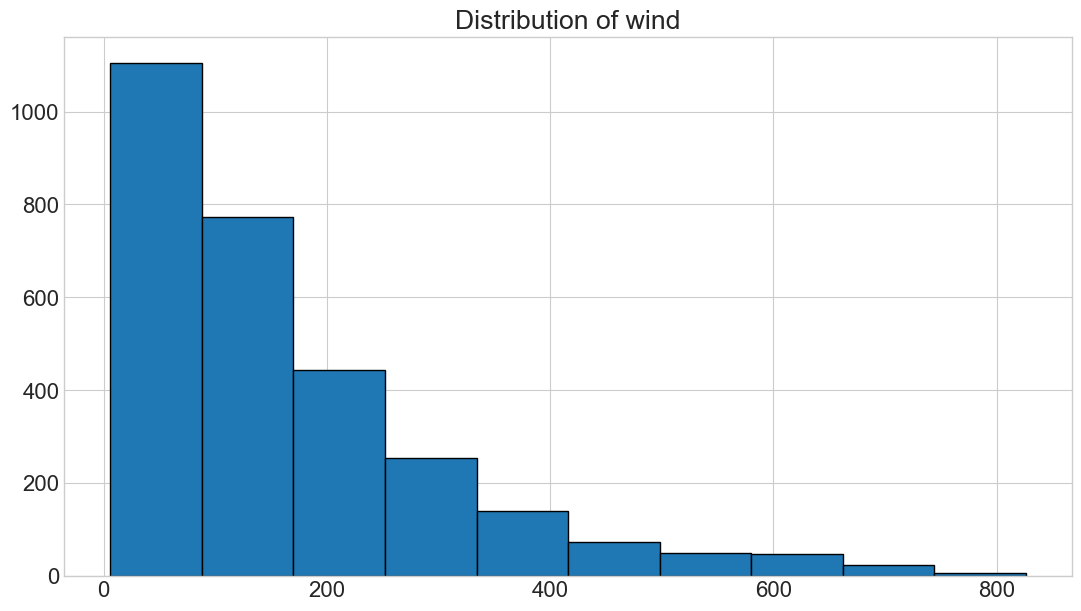

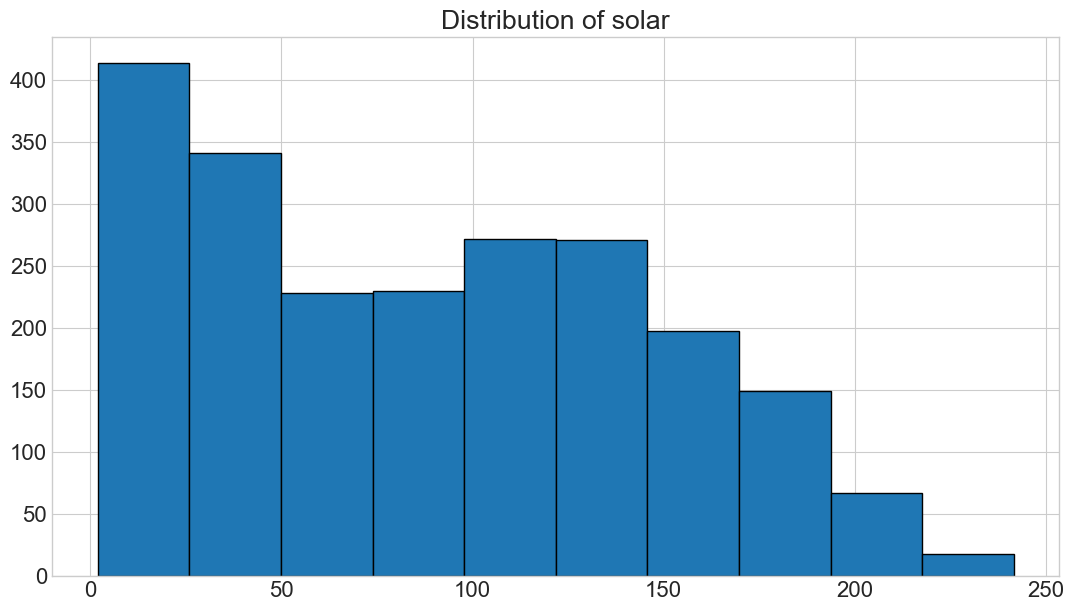

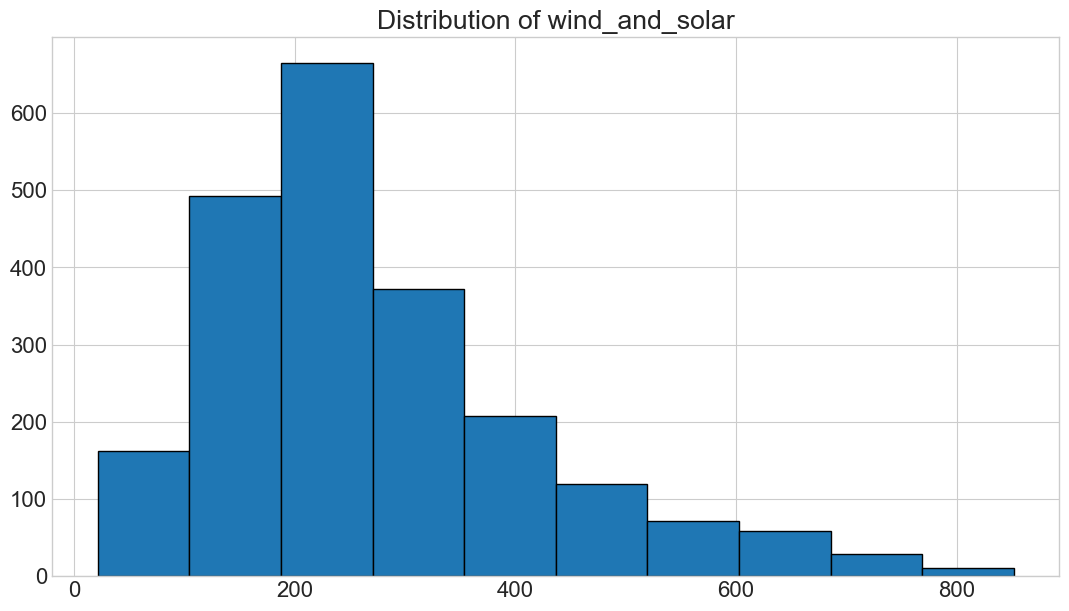

In [19]:
p.plot_cols(df)

#### 3. Set the index to be the datetime variable.


In [20]:
df = p.set_date_index_energy(df)
df.head()

,consumption,wind,solar,wind_and_solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


#### 4. Add a month and a year column to your dataframe.


In [21]:
df = p.add_cols_energy(df)

In [22]:
df.columns.tolist()

['consumption', 'wind', 'solar', 'wind_and_solar', 'month', 'year']

#### 5. Fill any missing values.


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   consumption     4383 non-null   float64
 1   wind            2920 non-null   float64
 2   solar           2188 non-null   float64
 3   wind_and_solar  2187 non-null   float64
 4   month           4383 non-null   object 
 5   year            4383 non-null   object 
dtypes: float64(4), object(2)
memory usage: 239.7+ KB


In [24]:
# it appears that NaNs were entered when there was no wind
# or solar being produced. Therefore, it makes sense to replace
# them with zeros.

In [25]:
df = p.fillna_energy(df)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   consumption     4383 non-null   float64
 1   wind            4383 non-null   float64
 2   solar           4383 non-null   float64
 3   wind_and_solar  4383 non-null   float64
 4   month           4383 non-null   object 
 5   year            4383 non-null   object 
dtypes: float64(4), object(2)
memory usage: 239.7+ KB


#### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [27]:
df.head()

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006
